<a href="https://colab.research.google.com/github/balsrini/Assignment4/blob/master/Fourth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br>
Created on 20-May-2019<br>
@author: Balaji<br>


In [0]:
#Modifying the learning rate to 0.001 and increasing epoch to 20. Adding validation 
#import of the keras library
import keras

In [0]:
#import the numerical pyhton libraries and keras libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [0]:
#Get the data from the mnist. This is a typical 28 x 28 image size
from keras.datasets import mnist

In [0]:
#load the data into our Training  and Validation data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


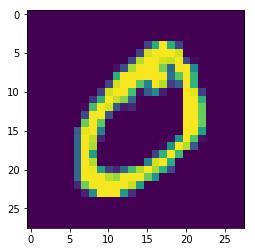

In [0]:
#plot the shapes from the matrix to the image
print (X_train.shape)
from matplotlib import pyplot as plt
plt.imshow(X_train[1])
plt.show()

In [0]:
#reshape the cell size for uniformity
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#normalize all the images by dividing with 255 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
#show the first 10 data
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
#load the training data
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#show the training data in matrix format
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#CNN network to predect the integers
from keras.layers import Activation
model = Sequential()
#Starting block
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 28 -> 26
model.add(BatchNormalization())

#Convolution block
model.add(Convolution2D(15, 3, 3, activation='relu')) # 26 -> 24
model.add(BatchNormalization())
model.add(Convolution2D(23, 3, 3, activation='relu')) # 24 -> 22
model.add(BatchNormalization())

#adding a dropout
model.add(Dropout(0.25))

#Transistion block
model.add(MaxPooling2D(pool_size=(2, 2))) # 22 -> 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11 -> 11
model.add(BatchNormalization())

#Convolution block
model.add(Convolution2D(15, 3, 3, activation='relu')) # 11 -> 9
model.add(BatchNormalization())
model.add(Convolution2D(23, 3, 3, activation='relu')) # 9 -> 7
model.add(BatchNormalization())

#adding a dropout
model.add(Dropout(0.25))

#Ant Man. Not using Max it will not get accuracy
model.add(Convolution2D(10, 1, 1, activation='relu')) # 7 -> 7
model.add(BatchNormalization())

#Convolution block
model.add(Convolution2D(15, 3, 3, activation='relu')) # 7 -> 5
model.add(BatchNormalization())
model.add(Convolution2D(23, 3, 3, activation='relu')) # 5 -> 3

#Prediction Block
model.add(Convolution2D(10, 3)) # 3 -> 1
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packa

In [0]:
#Create the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 15)        1365      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 22, 22, 23)        3128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 23)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 10)        240       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 9, 9, 15)          1365      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 7, 7, 23)          3128      
__________

In [0]:
#compile the model
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001)
             metrics=['accuracy'])

In [0]:
#Run the backprogation for 10 epochs with batch size of 32 on the training data
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test),  callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 250s 4ms/step - loss: 0.1919 - acc: 0.9393
Epoch 2/10
60000/60000 [==============================] - 251s 4ms/step - loss: 0.0565 - acc: 0.9821
Epoch 3/10
29664/60000 [=============>................] - ETA: 2:09 - loss: 0.0451 - acc: 0.9858

In [0]:
#Evaluate the mode with the test data.
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
#print the score
print(score)

[0.03329409108719992, 0.991]
